# 4주차: 탐색적 데이터 분석 (EDA)

## 학습 목표
- 탐색적 데이터 분석의 기본 개념과 중요성을 이해하자
- 기술통계와 데이터 분포를 체계적으로 분석하자
- 상관관계 분석을 통해 변수 간의 관계를 파악하자
- 이상치를 탐지하고 처리하는 방법을 배우자

## 1. EDA란 무엇인가?

탐색적 데이터 분석(Exploratory Data Analysis, EDA)은 데이터를 이해하는 첫 번째 단계다.
데이터의 구조, 패턴, 이상치, 분포 등을 시각화와 통계를 통해 파악한다.
음원 데이터 분석에서는 특히 특징들 간의 관계와 장르별 차이를 발견하는 데 중요하다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# 스타일 설정
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

## 2. 데이터 준비

### 2.1 음원 데이터셋 생성

실제 음원 분석에서 자주 사용되는 특징들로 가상의 데이터셋을 만들어보자.
각 특징은 음악의 다른 측면을 나타내며, 장르별로 다른 분포를 가진다.

In [2]:
# 시드 설정으로 재현 가능한 결과
np.random.seed(42)
n_tracks = 1000

# 장르 정의
genres = ['Pop', 'Rock', 'Electronic', 'Classical', 'Jazz', 'Hip-Hop', 'Country']
genre_weights = [0.2, 0.18, 0.15, 0.12, 0.1, 0.15, 0.1]

# 기본 데이터 구조
music_data = pd.DataFrame({
    'track_id': [f'T{i:04d}' for i in range(n_tracks)],
    'genre': np.random.choice(genres, n_tracks, p=genre_weights),
    'year': np.random.randint(1990, 2024, n_tracks)
})

# 음향 특징들 (0-1 스케일)
features = ['tempo', 'energy', 'danceability', 'valence', 'acousticness', 
           'instrumentalness', 'liveness', 'speechiness', 'loudness']

# 장르별 특성을 반영한 특징 생성
for feature in features:
    music_data[feature] = 0.0

# 장르별 특성 정의
for genre in genres:
    mask = music_data['genre'] == genre
    count = mask.sum()
    
    if genre == 'Pop':
        music_data.loc[mask, 'tempo'] = np.clip(np.random.normal(0.65, 0.15, count), 0, 1)
        music_data.loc[mask, 'energy'] = np.random.beta(6, 3, count)
        music_data.loc[mask, 'danceability'] = np.random.beta(7, 3, count)
        music_data.loc[mask, 'valence'] = np.random.beta(6, 4, count)
        music_data.loc[mask, 'acousticness'] = np.random.beta(3, 7, count)
    elif genre == 'Rock':
        music_data.loc[mask, 'tempo'] = np.clip(np.random.normal(0.7, 0.2, count), 0, 1)
        music_data.loc[mask, 'energy'] = np.random.beta(8, 2, count)
        music_data.loc[mask, 'danceability'] = np.random.beta(5, 5, count)
        music_data.loc[mask, 'valence'] = np.random.beta(5, 5, count)
        music_data.loc[mask, 'acousticness'] = np.random.beta(2, 8, count)
        music_data.loc[mask, 'loudness'] = np.random.beta(7, 3, count)
    elif genre == 'Electronic':
        music_data.loc[mask, 'tempo'] = np.clip(np.random.normal(0.75, 0.15, count), 0, 1)
        music_data.loc[mask, 'energy'] = np.random.beta(7, 2, count)
        music_data.loc[mask, 'danceability'] = np.random.beta(8, 2, count)
        music_data.loc[mask, 'valence'] = np.random.beta(6, 4, count)
        music_data.loc[mask, 'acousticness'] = np.random.beta(1, 9, count)
        music_data.loc[mask, 'instrumentalness'] = np.random.beta(6, 4, count)
    elif genre == 'Classical':
        music_data.loc[mask, 'tempo'] = np.clip(np.random.normal(0.4, 0.2, count), 0, 1)
        music_data.loc[mask, 'energy'] = np.random.beta(3, 7, count)
        music_data.loc[mask, 'danceability'] = np.random.beta(2, 8, count)
        music_data.loc[mask, 'valence'] = np.random.beta(4, 6, count)
        music_data.loc[mask, 'acousticness'] = np.random.beta(9, 1, count)
        music_data.loc[mask, 'instrumentalness'] = np.random.beta(8, 2, count)
        music_data.loc[mask, 'liveness'] = np.random.beta(6, 4, count)
    elif genre == 'Jazz':
        music_data.loc[mask, 'tempo'] = np.clip(np.random.normal(0.55, 0.25, count), 0, 1)
        music_data.loc[mask, 'energy'] = np.random.beta(5, 5, count)
        music_data.loc[mask, 'danceability'] = np.random.beta(4, 6, count)
        music_data.loc[mask, 'valence'] = np.random.beta(5, 5, count)
        music_data.loc[mask, 'acousticness'] = np.random.beta(7, 3, count)
        music_data.loc[mask, 'instrumentalness'] = np.random.beta(6, 4, count)
        music_data.loc[mask, 'liveness'] = np.random.beta(7, 3, count)
    elif genre == 'Hip-Hop':
        music_data.loc[mask, 'tempo'] = np.clip(np.random.normal(0.5, 0.15, count), 0, 1)
        music_data.loc[mask, 'energy'] = np.random.beta(6, 4, count)
        music_data.loc[mask, 'danceability'] = np.random.beta(8, 2, count)
        music_data.loc[mask, 'valence'] = np.random.beta(4, 6, count)
        music_data.loc[mask, 'acousticness'] = np.random.beta(2, 8, count)
        music_data.loc[mask, 'speechiness'] = np.random.beta(7, 3, count)
        music_data.loc[mask, 'loudness'] = np.random.beta(6, 4, count)
    else:  # Country
        music_data.loc[mask, 'tempo'] = np.clip(np.random.normal(0.6, 0.2, count), 0, 1)
        music_data.loc[mask, 'energy'] = np.random.beta(5, 5, count)
        music_data.loc[mask, 'danceability'] = np.random.beta(5, 5, count)
        music_data.loc[mask, 'valence'] = np.random.beta(6, 4, count)
        music_data.loc[mask, 'acousticness'] = np.random.beta(6, 4, count)

# 기본 특징이 없는 경우 랜덤 값으로 채우기
for feature in ['instrumentalness', 'liveness', 'speechiness', 'loudness']:
    mask = music_data[feature] == 0
    music_data.loc[mask, feature] = np.random.beta(3, 7, mask.sum())

# 인기도 점수 (0-100)
music_data['popularity'] = np.random.beta(3, 5, n_tracks) * 100

# 트랙 길이 (초)
music_data['duration_ms'] = np.random.randint(90000, 480001, n_tracks)

print(f"음원 데이터셋 생성 완료!")
print(f"총 {n_tracks}개 트랙, {len(genres)}개 장르")
print(f"특징 수: {len(features) + 3}개")
print(f"데이터 형태: {music_data.shape}")

음원 데이터셋 생성 완료!
총 1000개 트랙, 7개 장르
특징 수: 12개
데이터 형태: (1000, 14)


## 3. 데이터 개요 파악

### 3.1 기본 정보 확인

In [3]:
# 데이터 기본 정보
print("=== 데이터 기본 정보 ===")
print(f"행 수: {music_data.shape[0]}")
print(f"열 수: {music_data.shape[1]}")
print(f"메모리 사용량: {music_data.memory_usage(deep=True).sum() / 1024:.2f} KB")
print()

# 데이터 타입
print("=== 데이터 타입 ===")
print(music_data.dtypes)
print()

# 결측값 확인
print("=== 결측값 확인 ===")
missing_values = music_data.isnull().sum()
if missing_values.sum() == 0:
    print("결측값 없음 ✅")
else:
    print(missing_values[missing_values > 0])
print()

# 장르 분포
print("=== 장르 분포 ===")
genre_counts = music_data['genre'].value_counts()
for genre, count in genre_counts.items():
    percentage = count / len(music_data) * 100
    print(f"{genre}: {count}개 ({percentage:.1f}%)")

# 처음 5개 행 확인
print("\n=== 샘플 데이터 ===")
display(music_data.head())

=== 데이터 기본 정보 ===
행 수: 1000
열 수: 14
메모리 사용량: 215.94 KB

=== 데이터 타입 ===
track_id             object
genre                object
year                  int64
tempo               float64
energy              float64
danceability        float64
valence             float64
acousticness        float64
instrumentalness    float64
liveness            float64
speechiness         float64
loudness            float64
popularity          float64
duration_ms           int64
dtype: object

=== 결측값 확인 ===
결측값 없음 ✅

=== 장르 분포 ===
Pop: 225개 (22.5%)
Rock: 176개 (17.6%)
Hip-Hop: 143개 (14.3%)
Electronic: 137개 (13.7%)
Classical: 133개 (13.3%)
Country: 100개 (10.0%)
Jazz: 86개 (8.6%)

=== 샘플 데이터 ===


,track_id,genre,year,tempo,energy,danceability,valence,acousticness,instrumentalness,liveness,speechiness,loudness,popularity,duration_ms
0,T0000,Rock,2001,0.608047,0.458752,0.245732,0.588923,0.282447,0.088074,0.336673,0.464900,0.311668,39.319875,465950
1,T0001,Country,2005,0.469144,0.347692,0.458378,0.315818,0.509574,0.399501,0.473608,0.043432,0.398806,36.434200,173165
2,T0002,Jazz,2013,0.852342,0.515877,0.651520,0.620969,0.572717,0.209833,0.898986,0.162273,0.179950,35.048203,164167
3,T0003,Classical,2008,0.397620,0.365457,0.178130,0.374280,0.710489,0.542374,0.767818,0.341070,0.358164,36.568503,267431
4,T0004,Pop,1997,0.527422,0.862563,0.662164,0.679737,0.279537,0.298738,0.812308,0.260971,0.136211,37.630879,350069


### 3.2 수치형 변수 기술통계

기술통계는 데이터의 '첫인상'을 알려준다. 평균, 중앙값, 표준편차 등을 통해 각 특징의 범위와 분포를 이해할 수 있다.
음원 데이터에서는 에너지나 댄서빌리티 같은 특징들이 어떤 범위에 분포하는지, 얼마나 다양한지 파악하는 것이 중요하다.

In [4]:
# 수치형 변수 선택
numeric_features = ['tempo', 'energy', 'danceability', 'valence', 'acousticness', 
                   'instrumentalness', 'liveness', 'speechiness', 'loudness', 
                   'popularity', 'duration_ms', 'year']

# 기술통계
desc_stats = music_data[numeric_features].describe()
print("=== 기술통계 ===")
print(desc_stats.round(3))
print()

# 추가 통계량
print("=== 추가 통계량 ===")
for feature in numeric_features[:9]:  # 음향 특징만
    data = music_data[feature]
    print(f"{feature}:")
    print(f"  왜도(Skewness): {stats.skew(data):.3f}")
    print(f"  첨도(Kurtosis): {stats.kurtosis(data):.3f}")
    print(f"  변동계수(CV): {data.std()/data.mean():.3f}")
    print()

=== 기술통계 ===
          tempo    energy  danceability   valence  acousticness  \
count  1000.000  1000.000      1000.000  1000.000      1000.000   
mean      0.598     0.614         0.586     0.518         0.387   
std       0.210     0.214         0.246     0.169         0.295   
min       0.000     0.039         0.014     0.060         0.000   
25%       0.457     0.459         0.412     0.393         0.149   
50%       0.610     0.640         0.624     0.530         0.284   
75%       0.740     0.786         0.792     0.641         0.611   
max       1.000     0.981         0.991     0.924         0.999   

       instrumentalness  liveness  speechiness  loudness  popularity  \
count          1000.000  1000.000     1000.000  1000.000    1000.000   
mean              0.432     0.382        0.354     0.415      37.093   
std               0.237     0.193        0.197     0.212      15.925   
min               0.022     0.039        0.031     0.028       3.042   
25%               0.240

## 4. 데이터 분포 분석

데이터 분포를 보면 '데이터의 모양'을 알 수 있다. 대부분의 값이 어디에 몰려있는지, 치우쳐 있는지, 여러 개의 봉우리가 있는지 등을 파악한다.
이는 나중에 어떤 분석 방법을 사용할지 결정하는 데 중요한 단서가 된다.

### 4.1 단변량 분포 시각화

각 특징이 개별적으로 어떤 분포를 가지는지 확인해보자. 히스토그램은 데이터의 '모양'을, 박스플롯은 데이터의 '요약'을 보여준다.
음원 데이터에서 에너지가 높은 곡이 많은지, 댄서빌리티가 고르게 분포하는지 등을 시각적으로 파악할 수 있다.

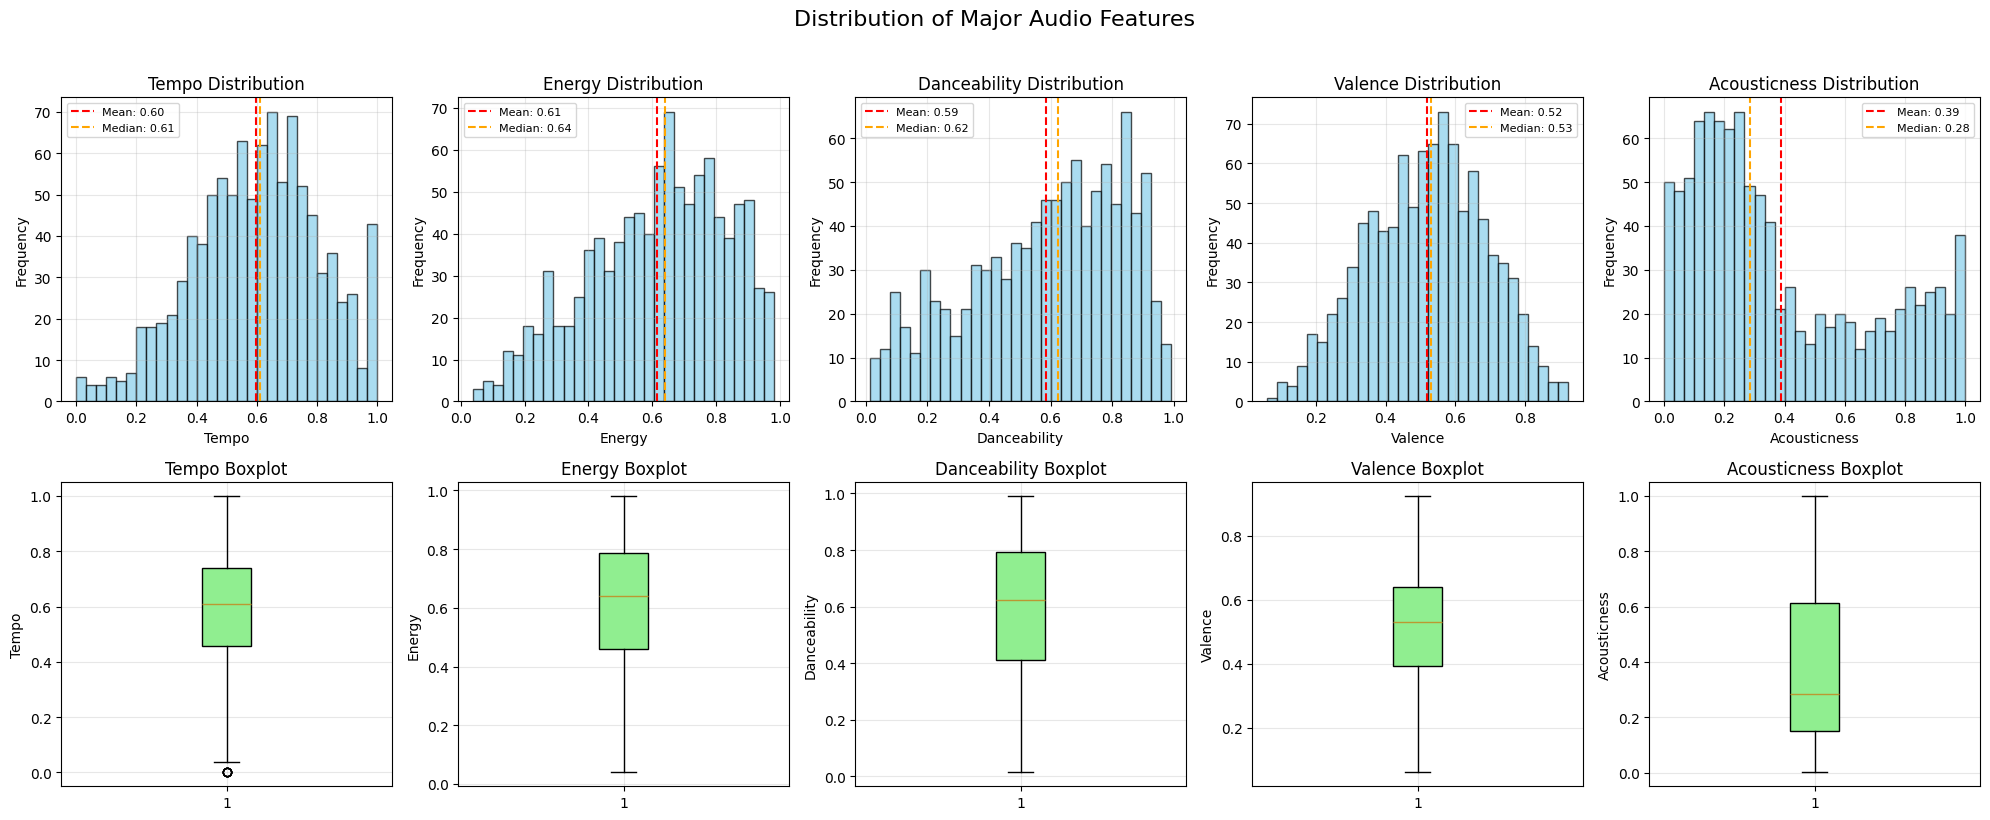

📊 분포 해석:
  tempo: 대칭적 (왜도: -0.24)
  energy: 대칭적 (왜도: -0.40)
  danceability: 대칭적 (왜도: -0.48)
  valence: 대칭적 (왜도: -0.12)
  acousticness: 우측 치우침 (왜도: 0.68)


In [5]:
# 주요 음향 특징들의 분포
main_features = ['tempo', 'energy', 'danceability', 'valence', 'acousticness']

# 히스토그램과 박스플롯 서브플롯
fig, axes = plt.subplots(2, len(main_features), figsize=(20, 8))
fig.suptitle('Distribution of Major Audio Features', fontsize=16, y=1.02)

for i, feature in enumerate(main_features):
    # 히스토그램
    axes[0, i].hist(music_data[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, i].set_title(f'{feature.title()} Distribution')
    axes[0, i].set_xlabel(feature.title())
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].grid(True, alpha=0.3)
    
    # 통계값 표시
    mean_val = music_data[feature].mean()
    median_val = music_data[feature].median()
    axes[0, i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[0, i].axvline(median_val, color='orange', linestyle='--', label=f'Median: {median_val:.2f}')
    axes[0, i].legend(fontsize=8)
    
    # 박스플롯
    box_plot = axes[1, i].boxplot(music_data[feature], patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightgreen')
    axes[1, i].set_title(f'{feature.title()} Boxplot')
    axes[1, i].set_ylabel(feature.title())
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 분포 해석:")
for feature in main_features:
    skewness = stats.skew(music_data[feature])
    if abs(skewness) < 0.5:
        skew_desc = "대칭적"
    elif skewness > 0.5:
        skew_desc = "우측 치우침"
    else:
        skew_desc = "좌측 치우침"
    print(f"  {feature}: {skew_desc} (왜도: {skewness:.2f})")

### 4.2 장르별 분포 비교

같은 특징이라도 장르마다 다른 패턴을 보인다. 예를 들어 클래식은 어쿠스틱이 높고, 일렉트로닉은 댄서빌리티가 높을 것이다.
이런 차이를 시각화하면 장르 분류 모델을 만들 때 어떤 특징이 중요한지 힌트를 얻을 수 있다.

In [ ]:
# Plotly로 인터랙티브 분포 비교
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=['Tempo', 'Energy', 'Danceability', 'Valence', 'Acousticness', 'Overall Distribution'],
    specs=[[{'type': 'box'}, {'type': 'box'}, {'type': 'box'}],
           [{'type': 'box'}, {'type': 'box'}, {'type': 'violin'}]]
)

features_to_plot = ['tempo', 'energy', 'danceability', 'valence', 'acousticness']
positions = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2)]

# 각 특징에 대한 장르별 박스플롯
for feature, (row, col) in zip(features_to_plot, positions):
    for genre in genres:
        genre_data = music_data[music_data['genre'] == genre][feature]
        fig.add_trace(
            go.Box(y=genre_data, name=genre, showlegend=False),
            row=row, col=col
        )

# 전체 특징 비교를 위한 바이올린 플롯
for i, feature in enumerate(features_to_plot):
    fig.add_trace(
        go.Violin(y=music_data[feature], name=feature, box_visible=True, meanline_visible=True),
        row=2, col=3
    )

fig.update_layout(
    title='Audio Feature Distribution Comparison by Genre',
    height=800,
    showlegend=True
)

fig.show()

# 장르별 평균값 비교
genre_means = music_data.groupby('genre')[features_to_plot].mean()
print("\n🎵 장르별 특징 평균값:")
print(genre_means.round(3))

## 5. 상관관계 분석

상관관계 분석은 "이 특징이 높으면 저 특징도 높아질까?"라는 질문에 답한다.
예를 들어 에너지가 높은 곡은 댄서빌리티도 높을까? 어쿠스틱한 곡은 에너지가 낮을까?
이런 관계를 알면 중복되는 특징을 제거하거나, 새로운 특징을 만들 아이디어를 얻을 수 있다.

### 5.1 상관계수 계산과 히트맵

모든 특징 쌍의 관계를 한눈에 파악해보자. 히트맵은 숫자로 된 상관계수를 색깔로 표현해서 직관적으로 보여준다.
빨간색(양의 상관관계), 파란색(음의 상관관계), 흰색(관계없음)으로 패턴을 쉽게 발견할 수 있다.

In [ ]:
# 수치형 특징들의 상관관계 계산
audio_features = ['tempo', 'energy', 'danceability', 'valence', 'acousticness', 
                 'instrumentalness', 'liveness', 'speechiness', 'loudness']

correlation_matrix = music_data[audio_features].corr()

# 상관관계 히트맵 (Seaborn)
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # 상삼각 마스크

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.2f',
            square=True,
            cbar_kws={"shrink": .8})

plt.title('Audio Features Correlation Heatmap', fontsize=14, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 강한 상관관계 찾기
print("🔍 강한 상관관계 (|r| > 0.5):")
strong_corr = []

for i in range(len(audio_features)):
    for j in range(i+1, len(audio_features)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            strong_corr.append((audio_features[i], audio_features[j], corr_val))
            print(f"  {audio_features[i]} ↔ {audio_features[j]}: {corr_val:.3f}")

if not strong_corr:
    print("  강한 상관관계가 발견되지 않았습니다.")

### 5.2 산점도를 통한 관계 탐색

상관계수는 숫자 하나로 관계를 요약하지만, 산점도는 실제 데이터 점들을 보여준다.
페어플롯을 보면 어떤 특징 조합이 장르를 잘 구분하는지, 선형 관계인지 비선형 관계인지 알 수 있다.
장르별로 색깔을 다르게 하면 클러스터 패턴도 발견할 수 있다.

In [ ]:
# 주요 특징들의 페어플롯
key_features = ['energy', 'danceability', 'valence', 'acousticness', 'tempo']

# 샘플링 (시각화 성능을 위해)
sample_data = music_data.sample(n=500, random_state=42)

# Seaborn 페어플롯
g = sns.pairplot(sample_data[key_features + ['genre']], 
                 hue='genre', 
                 diag_kind='hist',
                 plot_kws={'alpha': 0.6, 's': 30})

g.fig.suptitle('Pairplot of Major Audio Features', y=1.02, fontsize=14)
plt.show()

# 인터랙티브 산점도 (Plotly)
fig = px.scatter_matrix(
    sample_data,
    dimensions=key_features,
    color='genre',
    title='Audio Features Scatter Plot Matrix (Interactive)',
    height=800
)

fig.update_layout(dragmode='select')
fig.show()

print("💡 페어플롯 해석 가이드:")
print("  - 대각선: 각 변수의 분포")
print("  - 하삼각: 산점도로 관계 확인")
print("  - 색상: 장르별 구분")
print("  - 클러스터: 비슷한 특성의 그룹")

### 5.3 특정 관계 심층 분석

전체적인 탐색 후에는 특별히 흥미로운 관계를 골라서 자세히 분석한다.
예를 들어 에너지와 댄서빌리티의 관계를 장르별, 시대별로 나누어 보면 더 세밀한 인사이트를 얻을 수 있다.
이런 심층 분석이 나중에 모델링의 아이디어가 된다.

In [ ]:
# Energy vs Danceability 관계 심층 분석
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 전체 산점도
scatter = axes[0].scatter(music_data['energy'], music_data['danceability'], 
                         c=music_data['valence'], cmap='viridis', alpha=0.6, s=20)
axes[0].set_xlabel('Energy')
axes[0].set_ylabel('Danceability')
axes[0].set_title('Energy vs Danceability (Color: Valence)')
plt.colorbar(scatter, ax=axes[0], label='Valence')

# 회귀선 추가
z = np.polyfit(music_data['energy'], music_data['danceability'], 1)
p = np.poly1d(z)
axes[0].plot(music_data['energy'], p(music_data['energy']), "r--", alpha=0.8)

# 상관계수 표시
r_value = music_data['energy'].corr(music_data['danceability'])
axes[0].text(0.05, 0.95, f'r = {r_value:.3f}', transform=axes[0].transAxes, 
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 장르별 평균값
genre_means = music_data.groupby('genre')[['energy', 'danceability']].mean()
axes[1].scatter(genre_means['energy'], genre_means['danceability'], 
               s=100, alpha=0.8, c=range(len(genres)), cmap='tab10')

for i, genre in enumerate(genres):
    axes[1].annotate(genre, 
                    (genre_means.loc[genre, 'energy'], genre_means.loc[genre, 'danceability']),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)

axes[1].set_xlabel('Energy (Average)')
axes[1].set_ylabel('Danceability (Average)')
axes[1].set_title('Genre-wise Energy vs Danceability Averages')
axes[1].grid(True, alpha=0.3)

# 시대별 변화
decade_data = music_data.copy()
decade_data['decade'] = (decade_data['year'] // 10) * 10
decade_means = decade_data.groupby('decade')[['energy', 'danceability']].mean()

axes[2].plot(decade_means.index, decade_means['energy'], 'o-', label='Energy', linewidth=2)
axes[2].plot(decade_means.index, decade_means['danceability'], 's-', label='Danceability', linewidth=2)
axes[2].set_xlabel('Decade')
axes[2].set_ylabel('Average Value')
axes[2].set_title('Temporal Change in Energy & Danceability')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 통계적 유의성 검정
from scipy.stats import pearsonr
stat, p_value = pearsonr(music_data['energy'], music_data['danceability'])
print(f"📈 Energy와 Danceability 상관관계:")
print(f"  피어슨 상관계수: {stat:.4f}")
print(f"  p-value: {p_value:.4e}")
print(f"  유의성: {'유의함 (p < 0.05)' if p_value < 0.05 else '유의하지 않음'}")

## 6. 이상치 탐지와 분석

이상치(outlier)는 다른 데이터와 현저히 다른 값들이다. 이들은 입력 오류일 수도 있고, 정말 특별한 음악일 수도 있다.
예를 들어 클래식 곡인데 댄서빌리티가 매우 높다면? 이런 특이한 경우들을 찾아서 분석해보자.

### 6.1 단변량 이상치 탐지

각 특징별로 극단적인 값들을 찾아보자. IQR 방법과 Z-score 방법 두 가지로 이상치를 탐지한다.
- IQR: 박스플롯의 수염을 벗어나는 값들 (분포에 상관없이 적용 가능)
- Z-score: 평균에서 3σ 이상 떨어진 값들 (정규분포 가정)

두 방법의 결과를 비교하면 어떤 기준이 더 적절한지 판단할 수 있다.

In [ ]:
def detect_outliers_iqr(data, column):
    """IQR 방법으로 이상치 탐지"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(data, column, threshold=3):
    """Z-score 방법으로 이상치 탐지"""
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]
    return outliers

# 주요 특징들의 이상치 탐지
outlier_features = ['tempo', 'energy', 'danceability', 'valence', 'popularity']

fig, axes = plt.subplots(2, len(outlier_features), figsize=(20, 8))
fig.suptitle('Outlier Detection - IQR vs Z-score Methods', fontsize=16)

outlier_summary = {}

for i, feature in enumerate(outlier_features):
    # IQR 방법
    iqr_outliers, lower, upper = detect_outliers_iqr(music_data, feature)
    
    # Z-score 방법
    zscore_outliers = detect_outliers_zscore(music_data, feature)
    
    outlier_summary[feature] = {
        'IQR': len(iqr_outliers),
        'Z-score': len(zscore_outliers)
    }
    
    # 박스플롯 (IQR 이상치 표시)
    bp1 = axes[0, i].boxplot(music_data[feature], patch_artist=True)
    bp1['boxes'][0].set_facecolor('lightblue')
    axes[0, i].scatter(np.ones(len(iqr_outliers)), iqr_outliers[feature], 
                      color='red', alpha=0.6, s=20)
    axes[0, i].set_title(f'{feature}\nIQR Outliers: {len(iqr_outliers)}')
    axes[0, i].set_ylabel('Value')
    
    # 히스토그램 (Z-score 이상치 표시)
    axes[1, i].hist(music_data[feature], bins=30, alpha=0.7, color='lightgreen')
    axes[1, i].hist(zscore_outliers[feature], bins=30, alpha=0.8, color='red')
    axes[1, i].set_title(f'Z-score Outliers: {len(zscore_outliers)}')
    axes[1, i].set_xlabel(feature)
    axes[1, i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 이상치 요약
print("🚨 이상치 탐지 결과:")
print("특징\t\tIQR 방법\tZ-score 방법")
print("-" * 40)
for feature in outlier_features:
    iqr_count = outlier_summary[feature]['IQR']
    zscore_count = outlier_summary[feature]['Z-score']
    print(f"{feature:<15}{iqr_count:>6}개\t{zscore_count:>8}개")

### 6.2 다변량 이상치 탐지

단일 특징으로는 정상이지만, 여러 특징을 종합하면 이상한 조합인 경우가 있다.
예: 에너지는 보통, 댄서빌리티도 보통이지만, 이 조합이 해당 장르에서는 매우 드문 경우.
Isolation Forest 알고리즘으로 이런 '다차원 이상치'를 찾을 수 있다.

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# 다변량 이상치 탐지를 위한 특징 선택
multi_features = ['tempo', 'energy', 'danceability', 'valence', 'acousticness']
X = music_data[multi_features].values

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Isolation Forest로 이상치 탐지
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = iso_forest.fit_predict(X_scaled)

# 이상치와 정상치 분리
music_data_with_outliers = music_data.copy()
music_data_with_outliers['is_outlier'] = outlier_labels == -1

outliers_multi = music_data_with_outliers[music_data_with_outliers['is_outlier']]
normal_data = music_data_with_outliers[~music_data_with_outliers['is_outlier']]

print(f"🔍 다변량 이상치 탐지 결과:")
print(f"  전체 데이터: {len(music_data)}개")
print(f"  이상치: {len(outliers_multi)}개 ({len(outliers_multi)/len(music_data)*100:.1f}%)")
print(f"  정상치: {len(normal_data)}개 ({len(normal_data)/len(music_data)*100:.1f}%)")

# 이상치 시각화
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Energy vs Danceability', 'Tempo vs Valence', 
                   'Outlier Genre Distribution', 'Outlier Feature Distribution'),
    specs=[[{'type': 'scatter'}, {'type': 'scatter'}],
           [{'type': 'bar'}, {'type': 'box'}]]
)

# 산점도 1: Energy vs Danceability
fig.add_trace(
    go.Scatter(x=normal_data['energy'], y=normal_data['danceability'],
              mode='markers', name='Normal', 
              marker=dict(color='blue', size=4, opacity=0.6)),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=outliers_multi['energy'], y=outliers_multi['danceability'],
              mode='markers', name='Outlier',
              marker=dict(color='red', size=6, opacity=0.8)),
    row=1, col=1
)

# 산점도 2: Tempo vs Valence
fig.add_trace(
    go.Scatter(x=normal_data['tempo'], y=normal_data['valence'],
              mode='markers', showlegend=False,
              marker=dict(color='blue', size=4, opacity=0.6)),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=outliers_multi['tempo'], y=outliers_multi['valence'],
              mode='markers', showlegend=False,
              marker=dict(color='red', size=6, opacity=0.8)),
    row=1, col=2
)

# 이상치의 장르 분포
outlier_genre_counts = outliers_multi['genre'].value_counts()
fig.add_trace(
    go.Bar(x=outlier_genre_counts.index, y=outlier_genre_counts.values,
          marker_color='red', showlegend=False),
    row=2, col=1
)

# 이상치와 정상치의 특징 분포 비교
fig.add_trace(
    go.Box(y=normal_data['energy'], name='Normal Energy', showlegend=False),
    row=2, col=2
)
fig.add_trace(
    go.Box(y=outliers_multi['energy'], name='Outlier Energy', showlegend=False),
    row=2, col=2
)

fig.update_layout(height=700, title='Multivariate Outlier Analysis')
fig.show()

# 이상치 특성 분석
print("\n🎵 이상치의 장르별 분포:")
for genre, count in outlier_genre_counts.items():
    total_genre = len(music_data[music_data['genre'] == genre])
    percentage = count / total_genre * 100
    print(f"  {genre}: {count}개 ({percentage:.1f}% of {genre})")

## 7. 시계열 분석

음악도 시대의 흐름에 따라 변한다. 90년대 팝과 2020년대 팝은 다르고, 전자음악의 발달로 전체적인 음악 특성도 변했을 것이다.
이런 시간적 변화를 분석하면 음악 역사의 흐름을 데이터로 확인할 수 있다.

### 7.1 연도별 음악 트렌드 분석

각 특징이 시간에 따라 어떤 추세를 보이는지 확인해보자. 연도별로 평균을 계산해서 선 그래프로 그리면 트렌드가 보인다.
예를 들어 에너지가 점점 높아지는 추세인지, 댄서빌리티가 최근에 급상승했는지 등을 확인할 수 있다.
통계적 검정으로 이런 트렌드가 유의미한지도 검증한다.

In [ ]:
# 연도별 특징 변화 분석
yearly_trends = music_data.groupby('year')[multi_features].mean()

# 인터랙티브 시계열 플롯
fig = go.Figure()

colors = ['blue', 'red', 'green', 'orange', 'purple']
for i, feature in enumerate(multi_features):
    fig.add_trace(go.Scatter(
        x=yearly_trends.index,
        y=yearly_trends[feature],
        mode='lines+markers',
        name=feature.title(),
        line=dict(color=colors[i], width=2),
        marker=dict(size=4)
    ))

fig.update_layout(
    title='Annual Music Feature Trends',
    xaxis_title='Year',
    yaxis_title='Average Value',
    height=500,
    hovermode='x unified'
)

fig.show()

# 트렌드 통계 분석
print("📈 연도별 트렌드 분석:")
for feature in multi_features:
    # 선형 회귀로 트렌드 계산
    years = yearly_trends.index.values
    values = yearly_trends[feature].values
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(years, values)
    
    trend_direction = "증가" if slope > 0 else "감소"
    significance = "유의함" if p_value < 0.05 else "유의하지 않음"
    
    print(f"  {feature}:")
    print(f"    트렌드: {trend_direction} (기울기: {slope:.6f})")
    print(f"    R²: {r_value**2:.3f}")
    print(f"    유의성: {significance} (p={p_value:.3f})")
    print()

### 7.2 장르별 시대 변화

전체 트렌드와 함께 장르별 트렌드도 중요하다. 록 음악은 시간에 따라 어떻게 변했을까? 팝은?
장르별로 다른 변화 패턴을 보일 수 있고, 어떤 장르는 일정하고 어떤 장르는 급변했을 수도 있다.
10년 단위로 묶어서 세대별 비교도 해보면 더 명확한 패턴을 발견할 수 있다.

In [ ]:
# 장르별 연도별 트렌드
genre_year_trends = music_data.groupby(['genre', 'year']).agg({
    'energy': 'mean',
    'danceability': 'mean',
    'valence': 'mean'
}).reset_index()

# 각 특징별 장르 트렌드 시각화
features_trend = ['energy', 'danceability', 'valence']

fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=[f'{feature.title()} Trends' for feature in features_trend]
)

for col, feature in enumerate(features_trend, 1):
    for genre in genres[:5]:  # 주요 5개 장르만
        genre_data = genre_year_trends[genre_year_trends['genre'] == genre]
        
        if len(genre_data) > 5:  # 충분한 데이터가 있는 경우만
            fig.add_trace(
                go.Scatter(
                    x=genre_data['year'],
                    y=genre_data[feature],
                    mode='lines+markers',
                    name=genre,
                    showlegend=(col == 1)  # 첫 번째 subplot에만 범례 표시
                ),
                row=1, col=col
            )

fig.update_layout(
    title='Music Feature Temporal Changes by Genre',
    height=400,
    showlegend=True
)

fig.show()

# 세대별 비교 (10년 단위)
music_data['decade'] = (music_data['year'] // 10) * 10
decade_analysis = music_data.groupby(['decade', 'genre'])[features_trend].mean().reset_index()

# 히트맵으로 세대-장르 패턴 시각화
decade_pivot = decade_analysis.pivot_table(
    values='energy', 
    index='genre', 
    columns='decade', 
    aggfunc='mean'
)

plt.figure(figsize=(12, 6))
sns.heatmap(decade_pivot, annot=True, cmap='YlOrRd', fmt='.2f', cbar_kws={'label': 'Energy'})
plt.title('Energy Levels by Genre and Decade')
plt.xlabel('Decade')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

print("🕐 세대별 음악 특성 변화:")
decade_means = music_data.groupby('decade')[features_trend].mean()
print(decade_means.round(3))

## 8. 고급 EDA 기법

기본적인 EDA를 마친 후에는 더 고급 기법을 사용해서 데이터의 숨겨진 패턴을 찾는다.
차원 축소, 클러스터링 같은 기법을 미리 맛보면서 다음 단계 분석을 준비한다.

### 8.1 주성분 분석(PCA) 미리보기

9개의 음향 특징을 2차원으로 압축해서 전체 구조를 한눈에 보자. PCA는 여러 특징을 몇 개의 '주성분'으로 요약하는 기법이다.
9차원 데이터를 2차원 평면에 투영하면 장르별 클러스터가 어떻게 분포하는지 볼 수 있다.
몇 %의 정보가 유지되는지도 확인해서 차원 축소의 효과를 평가한다.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 음향 특징만 선택
audio_features_full = ['tempo', 'energy', 'danceability', 'valence', 'acousticness', 
                      'instrumentalness', 'liveness', 'speechiness', 'loudness']

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(music_data[audio_features_full])

# PCA 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 설명된 분산 비율
explained_variance = pca.explained_variance_ratio_
print(f"🔍 PCA 결과:")
print(f"  PC1 설명 분산: {explained_variance[0]:.3f} ({explained_variance[0]*100:.1f}%)")
print(f"  PC2 설명 분산: {explained_variance[1]:.3f} ({explained_variance[1]*100:.1f}%)")
print(f"  총 설명 분산: {sum(explained_variance):.3f} ({sum(explained_variance)*100:.1f}%)")

# PCA 결과 시각화
fig = px.scatter(
    x=X_pca[:, 0], y=X_pca[:, 1],
    color=music_data['genre'],
    title=f'PCA Results (Explained Variance: {sum(explained_variance)*100:.1f}%)',
    labels={'x': f'PC1 ({explained_variance[0]*100:.1f}%)', 
            'y': f'PC2 ({explained_variance[1]*100:.1f}%)'},
    opacity=0.6
)

fig.update_layout(height=500)
fig.show()

# 주성분의 해석 (로딩)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=audio_features_full
)

print("\n📊 주성분 로딩 (각 특징의 기여도):")
print(loadings.round(3))

# 로딩 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# PC1 로딩
axes[0].barh(loadings.index, loadings['PC1'], color='blue', alpha=0.7)
axes[0].set_title('PC1 Loadings')
axes[0].set_xlabel('Loading Value')
axes[0].grid(True, alpha=0.3)

# PC2 로딩
axes[1].barh(loadings.index, loadings['PC2'], color='red', alpha=0.7)
axes[1].set_title('PC2 Loadings')
axes[1].set_xlabel('Loading Value')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. 추천 실습

강의에서는 가상의 데이터를 사용했지만, 실제 프로젝트에서는 진짜 데이터를 다뤄야 한다.
실제 데이터는 더 복잡하고 지저분하지만, 그만큼 의미 있는 발견을 할 수 있다.
이번에 배운 모든 기법을 순서대로 적용해보자.

### 실습 1: 실제 음원 데이터 EDA

Spotify나 공개 데이터셋으로 진짜 EDA 프로젝트를 완성해보자. 실제 데이터는 결측값, 이상치, 데이터 품질 문제가 있을 수 있다.
이런 현실적인 문제를 해결하면서 EDA를 수행하는 경험이 중요하다.
가설을 세우고, 검증하고, 새로운 발견을 하는 전체 과정을 경험해보자.

In [ ]:
# 실습 제안:
# 1. Kaggle의 Spotify Dataset 다운로드
# 2. 전체 EDA 파이프라인 적용:
#    - 기본 정보 확인
#    - 분포 분석
#    - 상관관계 분석
#    - 이상치 탐지
#    - 시계열 분석
# 3. 가설 설정 및 검증
# 4. 인사이트 도출 및 보고서 작성

### 실습 2: 가설 주도 EDA

단순히 데이터를 탐색하는 것을 넘어서 명확한 질문을 던지고 답을 찾는 과정이다.
"최근 음악이 더 에너지틱해졌을까?", "장르별 경계가 흐려지고 있을까?" 같은 구체적인 궁금증을 데이터로 검증한다.
이런 가설 중심 접근법이 더 의미 있는 인사이트를 만든다.

In [ ]:
# 실습 제안:
# 1. 구체적인 가설 3-5개 설정
# 2. 각 가설에 대한 분석 계획 수립
# 3. 적절한 통계적 검정 방법 선택
# 4. 시각화를 통한 결과 표현
# 5. 결론 도출 및 한계점 분석

### 심화 학습 제안

더 깊이 있는 EDA 학습을 원한다면 다음 주제들을 탐구해보자:

1. **고급 이상치 탐지**: Local Outlier Factor, DBSCAN 클러스터링
2. **비모수 통계**: Kolmogorov-Smirnov 검정, Mann-Whitney U 검정
3. **시계열 분해**: 추세, 계절성, 잡음 분리
4. **고차원 시각화**: t-SNE, UMAP을 활용한 차원 축소
5. **자동화된 EDA**: pandas-profiling, sweetviz 활용

이러한 기법들은 더 정교하고 깊이 있는 데이터 분석을 가능하게 한다.